In [1]:
SHOW_PLOT_FLAG = True

In [2]:
import sys

sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from constants import *
import matplotlib.gridspec as gridspec


# Figure 9

## Loading Data (Per seconds)

In [3]:
data = pd.read_csv('CuratedData/EU_Phy_UL_goodCQI.txt', sep='\t')
y = 'Tput(Mbps)'

## Plotting Data

In [4]:
def add_median_labels(ax, precision='.1f', flag='noCA'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    level = 0
    l = 120
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        if x%2 == 0:
            l = l+0
        else:
            l = l-0
        text = ax.text(x, y + (l-y), f'{value:{precision}}', ha='center', va='center',
                        color='#800000',  fontsize=9, zorder=20)
        l = 120

Showing Plot  Sec4_Fig9


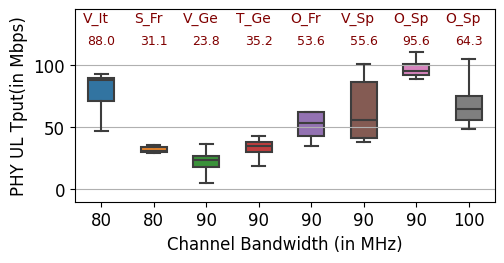

In [5]:
fig = plt.figure(figsize=(5, 3.5))
gs1 = gridspec.GridSpec(1, 1, wspace=0.8, hspace=0.2, top=.85, bottom=0.3, left=0.12, right=0.96, figure=fig)


ax0 = plt.subplot(gs1[0])
order = ['V_It', 'S_Fr', 'V_Ge', 'T_Ge', 'O_Fr',  'V_Sp', 'O_Sp_100Mhz', 'O_Sp_90Mhz']
ax0.yaxis.grid(True, which='major')

g = sns.boxplot(x='Config', y=y, data=data , dodge=True, width=0.5, showfliers=False, fliersize=0, ax=ax0, order=order)
add_median_labels(ax0)
    
ax0.set_ylim(-10, 145)
ax0.set_yticks([i for i in range(0, 145, 50)])#, fontsize=14)
ax0.set_yticklabels([t for t in range(0, 145, 50)], fontsize=12)
ax0.set_ylabel('PHY UL Tput(in Mbps)', fontsize=12)
ax0.set_xlabel('Channel Bandwidth (in MHz)', fontsize=12)
trans = ax0.get_xaxis_transform()

bw = [str(80), str(80), str(90), str(90), str(90), str(90), str(90), str(100)]
cfsORder = ['V_It', 'S_Fr', 'V_Ge',  'T_Ge', 'O_Fr', 'V_Sp', 'O_Sp', 'O_Sp' ]
ax0.set_xticklabels(bw, fontsize=12)
for x in range(len(cfsORder)):
    text = ax0.text(x-0.1, 138, cfsORder[x], ha='center', va='center', color='#800000', fontsize=10, zorder=20)

#### Showing plots
plot_name = 'Fig9'
plotme(plt, " Sec4", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)

